steps of a genetic algorithm:

initialization
evaluation
elitism
parent selection
reproduction
mutation

candlestick based genalg params:
modify these based off of largely expanded featurespace

popsize - 200
num gens - 9
elitism copys - 1
mutation prob - 5%
fresh pattern prob - 2%
min number of patterns - 2.5%

In [ ]:
import _09_utility as util

dataset = util.load_large_csv('spx_features.csv')


Trying to load CSV file into DataFrame...
loaded chunk 1 of size: 103800164
loaded chunk 2 of size: 103800164
loaded chunk 3 of size: 103800164
loaded chunk 4 of size: 103800164
loaded chunk 5 of size: 103800164
loaded chunk 6 of size: 103800164
loaded chunk 7 of size: 103800164
loaded chunk 8 of size: 103800164
loaded chunk 9 of size: 103800164
loaded chunk 10 of size: 103800164
loaded chunk 11 of size: 103800164
loaded chunk 12 of size: 103800164
loaded chunk 13 of size: 103800164
loaded chunk 14 of size: 92415380
concat chunks
concatted chunks
Success.
Size of dataset:	1441815380


In [2]:
fssr = util.fn_all_subsets(True,0,True)
fssd = util.fnsubset_to_indexdictlist(dataset.columns,fssr)
fss = []
for d in fssd:
    fss.append(list(d.keys()))
print(fss)

[[0, 1, 2, 4, 3, 5, 6, 151, 152, 153], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66], [67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126], [127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150], [154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212], [213, 214, 215, 216, 217, 218, 219

In [3]:
dataset = dataset.values
arr_low = dataset[:,1]
arr_close = dataset[:,2]

In [ ]:
#example for initiation and evaluation steps

from importlib import reload
import _00_gene as _0
reload(_0)
import _01_initialization as _1
reload(_1)
import _02_evaluation as _2
reload(_2)
import _03_elitism as _3
reload(_3)
import _04_parentselection as _4
reload(_4)
import _05_reproduction as _5
reload(_5)
import _06_mutation as _6
import _09_utility as util


#dataset = util.load_large_csv('spx_features.csv')
#dataset, fss = util.drop_all_targets()

log_normalize = True
lag_allowance = 30
generations = 10
hold_for = 15

#kelsch_ratio
#average_return
#profit_factor

criteria = 'average_return'

new_population = _1.generate_initial_population(
    sample_size=350,
    pattern_size=2,
    feat_idx_pool=fss,
    lag_allowance=lag_allowance,
    skew_lag_prob=False
)

print("collecting returns and kratio... ",end='')
arr_returns, arr_kratio = _1.collect_parallel_metrics(
	arr_close=arr_close,
	arr_low=arr_low,
	hold_for=hold_for,
	lag_allow=lag_allowance,
	log_normalize=log_normalize
)
print("complete.")

#begin generational loop
for generation in range(generations):

	population = new_population

	print(f"Generation {generation+1} ({criteria}): ",end='')

	returns, kelsch_ratio = _2.fitness(
		arr_close=arr_close,
		arr_low=arr_low,
		arr_returns=arr_returns,
		arr_kratio=arr_kratio,
		data=dataset,
		genes= population,
		hold_for=hold_for,
		lag_allow=lag_allowance,
		specific_data=None,#'form_519',
		log_normalize=log_normalize
	)
	unsorted_population = _2.associate(
		genes=population,
		returns=returns,
		kelsch_ratio=kelsch_ratio,
		log_normalize=log_normalize
	)
	population = _2.sort_population(
		population=unsorted_population,
		criteria=criteria
	)

	avg, top = _2.simple_generational_stat_output(population,criteria)
	print(f"AVG {avg}, BEST {top}, FROM {len(population)} GENES.")

	elites = _3.collect_elite(
		sorted_population=population,
		filter_criteria=1
	)
	parents = _4.collect_parents(
		sorted_population=population,
		criteria=criteria,
		num_parents=5
	)
	family = _5.reproduce(
		parents=parents,
		mode='exponential'
	)
	shuffled_family = _1.shuffle_population(
		population=family
	)
	mutated_family = _6.mutation_round(
		shuffled_population=shuffled_family,
		partial_mutation_prob=0.000,
		pattern_mutation_prob=0.000,
		feat_idx_pool=fss	
	)
	new_population = _1.combine_populations(
		populations=[elites, mutated_family]
	)

collecting returns and kratio... complete.
325000tion 1 (average_return): AVG 4.8529128839372834e-06, BEST 0.0002151051755301392, FROM 350 GENES.
pattern pool len = 10
combo len = 45
325000tion 2 (average_return): AVG 1.2809694571410148e-05, BEST 0.0002151051755301392, FROM 46 GENES.
pattern pool len = 9
combo len = 36
325000tion 3 (average_return): AVG 5.498919709460719e-05, BEST 0.0002816113196555392, FROM 37 GENES.
pattern pool len = 5
combo len = 10
325000tion 4 (average_return): AVG 0.00010687706471548061, BEST 0.0002816113196555392, FROM 11 GENES.
pattern pool len = 5
combo len = 10
325000tion 5 (average_return): AVG 0.00011608619738787887, BEST 0.0002816113196555392, FROM 11 GENES.
pattern pool len = 5
combo len = 10
325000tion 6 (average_return): AVG 0.00011608619738787887, BEST 0.0002816113196555392, FROM 11 GENES.
pattern pool len = 5
combo len = 10
325000tion 7 (average_return): AVG 0.00011608619738787887, BEST 0.0002816113196555392, FROM 11 GENES.
pattern pool len = 3
combo

In [ ]:
import zGeneticAlgorithm._00_gene as _0
import zGeneticAlgorithm._09_utility as  util
reload(_0)
reload(util)
reload(_2)

print(_2.show_best_gene_patterns(population,criteria,fssd))

(199)vol_m47_spx[16] < (164)vol_m12_spx[15]
(421)diff_ma_60_240_spx[19] < (410)diff_ma_5_60_spx[22]
Profit Factor:	4.75
Average Return:	0.00028	(~1.41 on /MES == $7.05)
Average KRatio:	0.00010780596491910543	(~0.54 on /MES == $2.7)



347258
347258


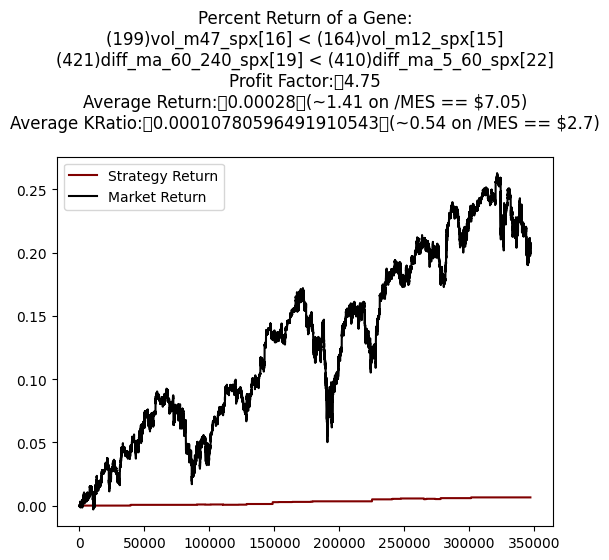

In [11]:
reload(_0)
reload(_2)
_2.show_returns(elites[0]._lastarray_returns, arr_close=arr_close, gene_kwargs={"population":population,"criteria":criteria,"fss":fssd})